In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns



In [29]:
#ruta
ruta = os.path.join("..", "data", "remote_work_productivity.csv")

# cargar CSV
df = pd.read_csv(ruta)

# mostrar el data frame
df


,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
...,...,...,...,...,...
995,996,Remote,33,88,82
996,997,Remote,33,88,73
997,998,In-Office,45,74,61
998,999,In-Office,57,50,52


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee_ID            1000 non-null   int64 
 1   Employment_Type        1000 non-null   object
 2   Hours_Worked_Per_Week  1000 non-null   int64 
 3   Productivity_Score     1000 non-null   int64 
 4   Well_Being_Score       1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [31]:
display(df.describe())

,Employee_ID,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.720000,68.602000,63.975000
std,288.819436,8.042779,12.235494,13.870572
min,1.000000,16.000000,33.000000,14.000000
25%,250.750000,34.750000,60.000000,56.000000
50%,500.500000,40.000000,68.000000,65.000000
75%,750.250000,45.000000,76.000000,73.000000
max,1000.000000,64.000000,112.000000,104.000000


In [32]:
#renombramos las columnas
df = df.rename(columns={
    "Employee_ID": "ID trabajador",
    "Employment_Type": "Modalidad",      # remoto o presencial
    "Hours_Worked_Per_Week": "Horas trabajadas por semana",   
    "Productivity_Score": "Productividad",      # remoto o presencial
    "Well_Being_Score": "Bienestar",     # remoto o presencial,
})
df.head()

,ID trabajador,Modalidad,Horas trabajadas por semana,Productividad,Bienestar
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74


In [33]:
# REVISAMOS SI HAY DUPLICADOS
print("Duplicados:", df.duplicated().sum())

#ELIMINAR DUPLICADOS SI HAY
df = df.drop_duplicates()

# REVISAMOS SI HAY VALORES NULOS
print("Valores nulos por columna:")
print(df.isnull().sum())


Duplicados: 0
Valores nulos por columna:
ID trabajador                  0
Modalidad                      0
Horas trabajadas por semana    0
Productividad                  0
Bienestar                      0
dtype: int64


In [34]:
#revisamos los rangos de las columnas de productividad y bienestar
print(df["Productividad"].min(), df["Productividad"].max())
print(df["Bienestar"].min(), df["Bienestar"].max())
df[["Productividad", "Bienestar"]].describe()

#asi sabemos el rango de la escala


33 112
14 104


,Productividad,Bienestar
count,1000.000000,1000.000000
mean,68.602000,63.975000
std,12.235494,13.870572
min,33.000000,14.000000
25%,60.000000,56.000000
50%,68.000000,65.000000
75%,76.000000,73.000000
max,112.000000,104.000000


In [35]:
#dejemos la escala de 1 a 100, eliminando valores fuera de rango 
df = df[(df["Productividad"] >= 1) & (df["Productividad"] <= 100)]
df = df[(df["Bienestar"] >= 1) & (df["Bienestar"] <= 100)]

In [38]:
df["Modalidad"].describe()
#NOTAMOS QUE solo tenemos remoto y presencial, no hay hibrido 

count           985
unique            2
top       In-Office
freq            509
Name: Modalidad, dtype: object

In [ ]:
#creamos dataframes seprados para cada modalidad
df_remoto = df[df["Modalidad"] == "Remote"]
df_presencial = df[df["Modalidad"] == "In-Office"]


   ID trabajador Modalidad  Horas trabajadas por semana  Productividad  \
0              1    Remote                           29             75   
2              3    Remote                           34             74   
3              4    Remote                           25             81   
4              5    Remote                           50             70   
6              7    Remote                           38             44   

   Bienestar  
0         78  
2         89  
3         84  
4         74  
6         76  
    ID trabajador  Modalidad  Horas trabajadas por semana  Productividad  \
1               2  In-Office                           45             49   
5               6  In-Office                           48             66   
9              10  In-Office                           40             59   
14             15  In-Office                           47             76   
16             17  In-Office                           58             73   

    Bien

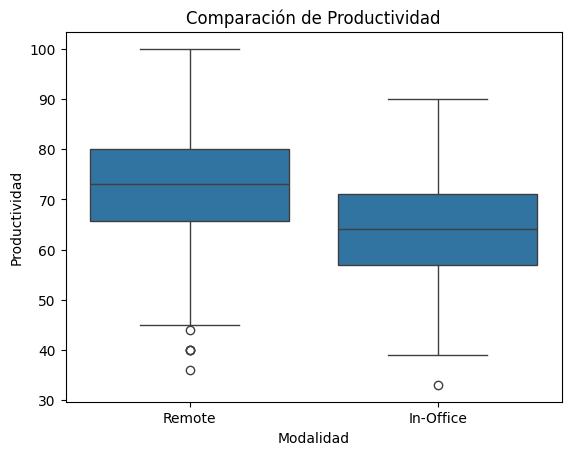

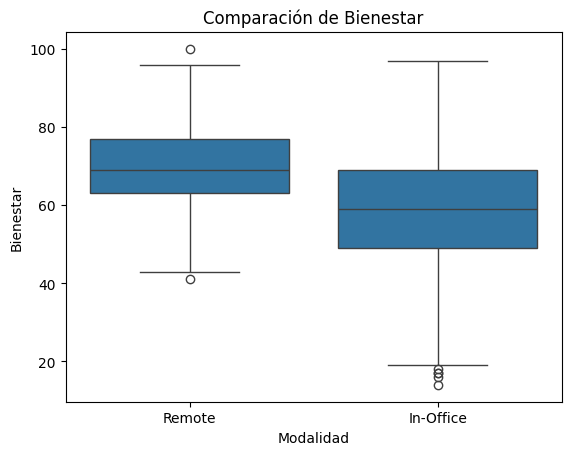

In [42]:

sns.boxplot(x="Modalidad", y="Productividad", data=df)
plt.title("Comparación de Productividad")
plt.show()

sns.boxplot(x="Modalidad", y="Bienestar", data=df)
plt.title("Comparación de Bienestar")
plt.show()


In [45]:
#calculemos los promedios de horas de trabajo, productividad y bienestar por modalidad
promedios = df.groupby("Modalidad")[["Horas trabajadas por semana", "Bienestar","Productividad"]].mean()
print(promedios)



           Horas trabajadas por semana  Bienestar  Productividad
Modalidad                                                       
In-Office                    44.430255  58.583497      63.789784
Remote                       34.827731  69.577731      72.707983


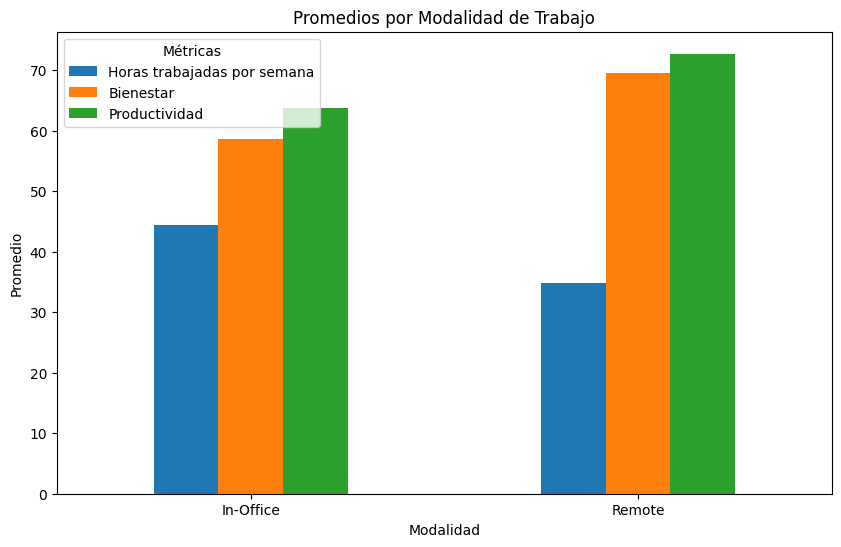

In [46]:
#creamos graficos para comparar mejor 
promedios.plot(kind='bar', figsize=(10, 6))
plt.title('Promedios por Modalidad de Trabajo')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.show()

In [ ]:
#guardemos el dataframe limpio 
ruta_salida = os.path.join("..", "data", "remote_work_productivity_cleaned.csv")
df.to_csv(ruta_salida, index=False)


